# COGS 118B - Final Project

In [22]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

In [23]:
data = pd.read_csv('CreditCard_dataset.csv')

#drop customer ID column
data.drop(columns=['CUST_ID'], inplace=True)

#replace null values with zeros
data['MINIMUM_PAYMENTS'].fillna(0, inplace=True)
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [24]:
null_count = data.isna().sum()

null_count

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [25]:
data.dropna(inplace=True)
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [26]:
null_count = data.isna().sum()

null_count

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [27]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

<Axes: >

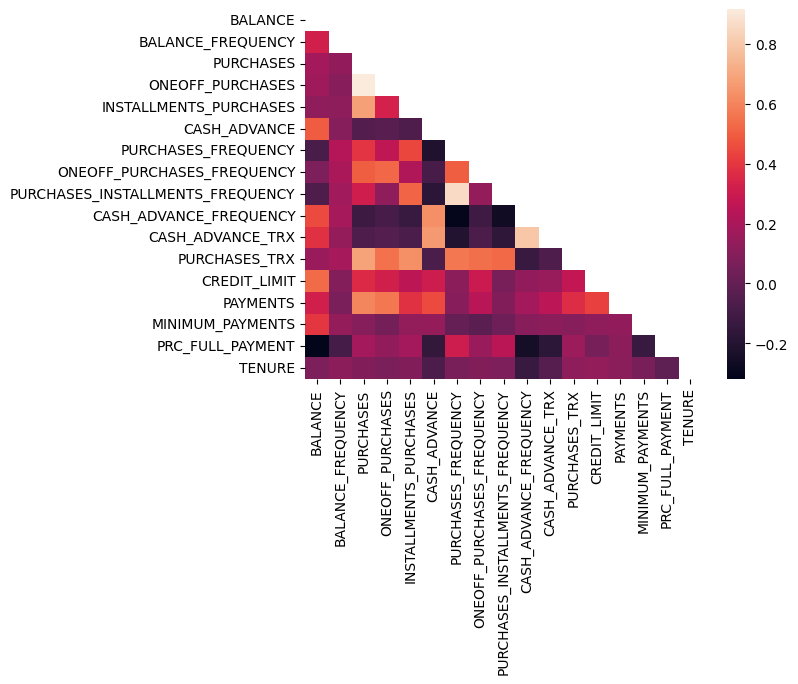

In [28]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask)

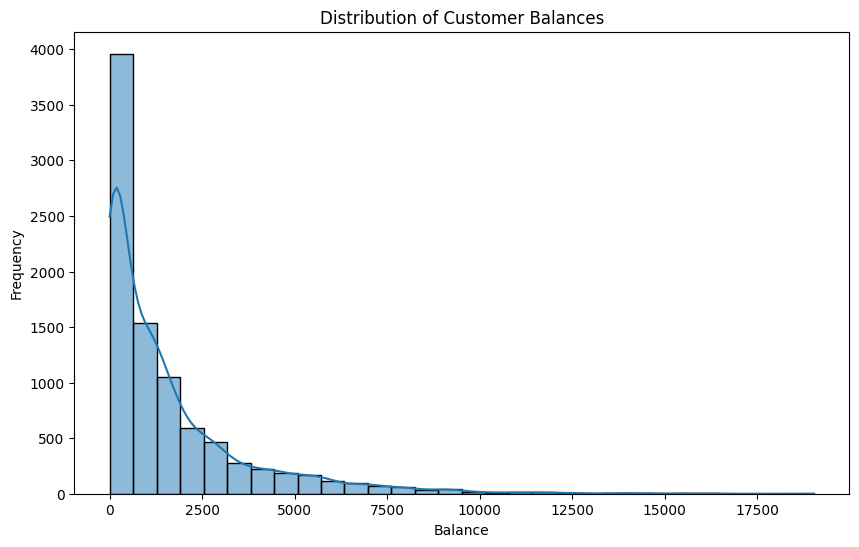

In [29]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a histogram for the 'BALANCE' column
sns.histplot(data['BALANCE'], bins=30, kde=True)

# Add a title and labels to the plot
plt.title('Distribution of Customer Balances')
plt.xlabel('Balance')
plt.ylabel('Frequency')

# Display the plot
plt.show()

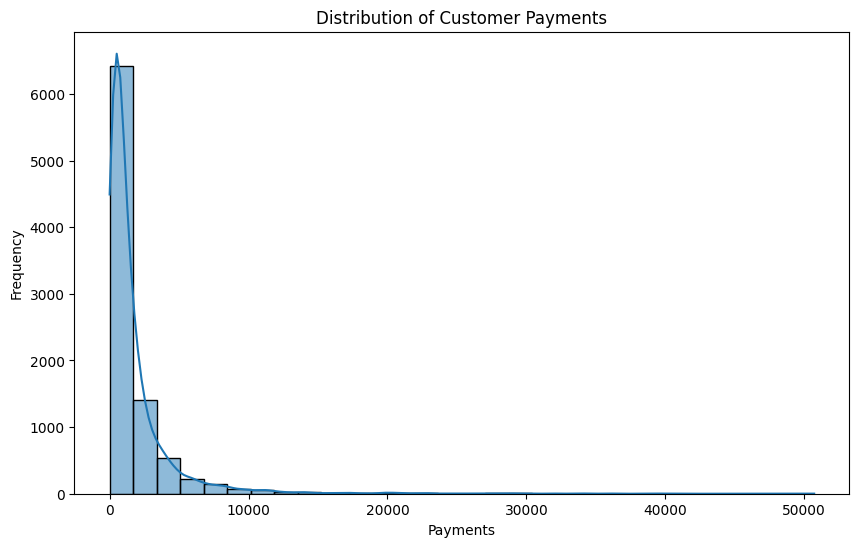

In [30]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a histogram for the 'PAYMENTS' column
sns.histplot(data['PAYMENTS'], bins=30, kde=True)

# Add a title and labels to the plot
plt.title('Distribution of Customer Payments')
plt.xlabel('Payments')
plt.ylabel('Frequency')

# Display the plot
plt.show()

<Axes: xlabel='pc1', ylabel='pc2'>

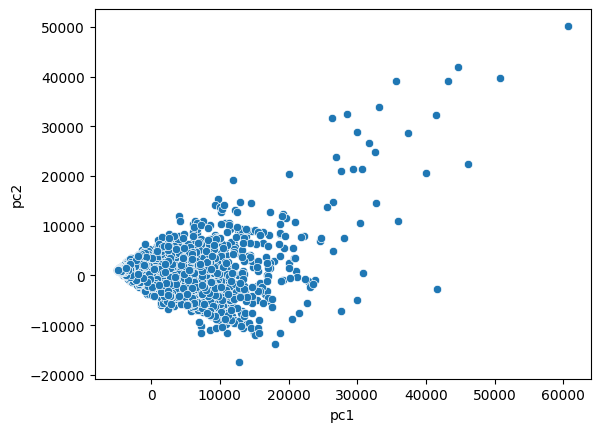

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(data)
pcs = pd.DataFrame(pcs, columns=['pc1', 'pc2'])
pcs.index = data.index

sns.scatterplot(pcs, x='pc1', y='pc2')

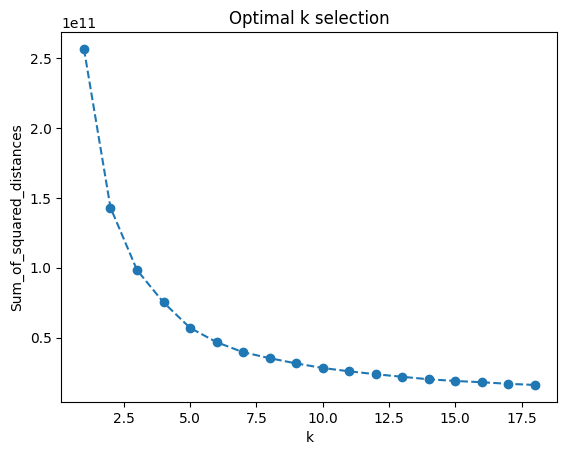

In [33]:
from sklearn.cluster import KMeans

sum_of_squared_distances = []
K = range(1,19)
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(pcs)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, marker='o', linestyle='--')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k selection')
plt.show()

<Axes: xlabel='pc1', ylabel='pc2'>

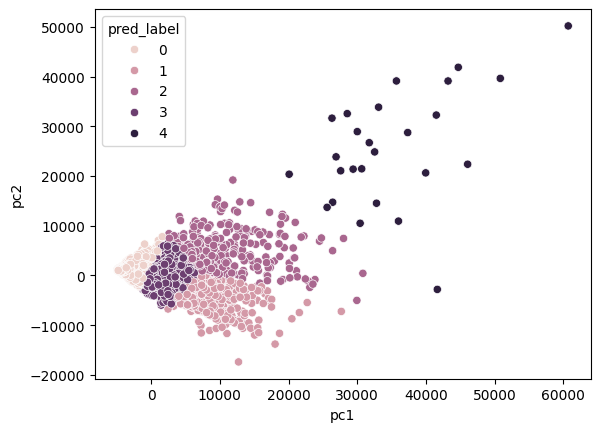

In [39]:
km = KMeans(n_clusters=5, n_init=10)
km = km.fit(pcs)
labels = km.labels_

pcs['pred_label'] = labels
sns.scatterplot(pcs, x='pc1', y='pc2', hue='pred_label')

### KMEANS

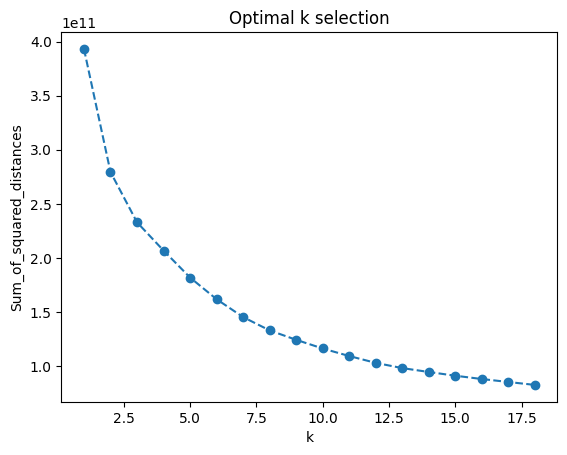

In [10]:
from sklearn.cluster import KMeans

sum_of_squared_distances = []
K = range(1,19)
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(data)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, marker='o', linestyle='--')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k selection')
plt.show()

In [11]:
def distortion_measure(points: np.ndarray, centroids: np.ndarray) -> float:
    distortion = 0
    for pt in points.values:
        dists = []
        for c in centroids:
            dists.append(np.sum((pt - c) ** 2) ** 0.5)

        distortion += min(dists)
    return distortion

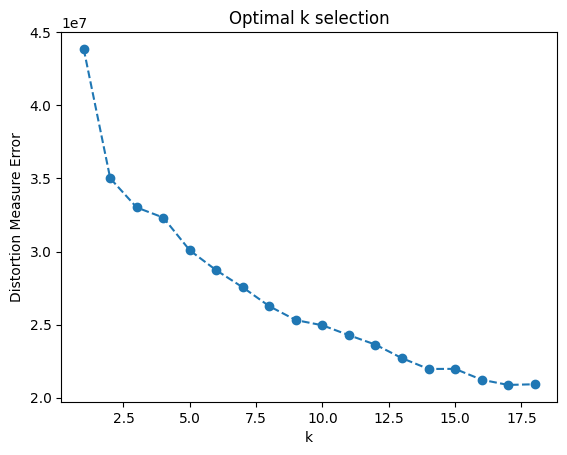

In [12]:
distortion_measure_error = []
K = range(1,19)
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(data)
    score = distortion_measure(data, km.cluster_centers_)
    distortion_measure_error.append(score)

plt.plot(K, distortion_measure_error, marker='o', linestyle='--')
plt.xlabel('k')
plt.ylabel('Distortion Measure Error')
plt.title('Optimal k selection')
plt.show()

In [13]:
scaler = StandardScaler()
scale_data = scaler.fit_transform(data)
scale_data = pd.DataFrame(scale_data, columns=data.columns)
scale_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.297334,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.101998,0.234159,0.360541
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.088524,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.357057,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.252265,-0.525588,0.360541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.738015,0.517980,-0.333331,-0.356957,-0.132688,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.486266,-0.336129,1.183844,-4.126919
8945,-0.742488,0.517980,-0.329174,-0.356957,-0.122869,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.503445,-0.357057,-0.525588,-4.126919
8946,-0.740463,-0.185895,-0.402000,-0.356957,-0.294930,-0.466805,0.854463,-0.678716,0.760359,-0.675294,-0.476083,-0.390691,-0.960380,-0.570660,-0.321774,0.329128,-4.126919
8947,-0.745239,-0.185895,-0.469584,-0.356957,-0.454607,-0.449373,-1.221928,-0.678716,-0.917090,0.157536,-0.183026,-0.591841,-1.097795,-0.580581,-0.333188,0.329128,-4.126919


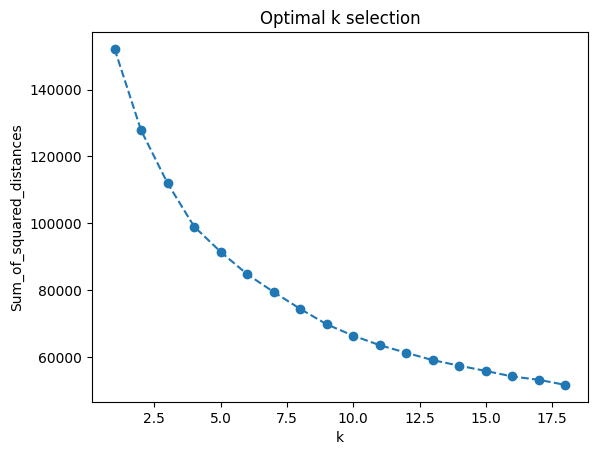

In [14]:
sum_of_squared_distances = []
K = range(1,19)
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(scale_data)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, marker='o', linestyle='--')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k selection')
plt.show()

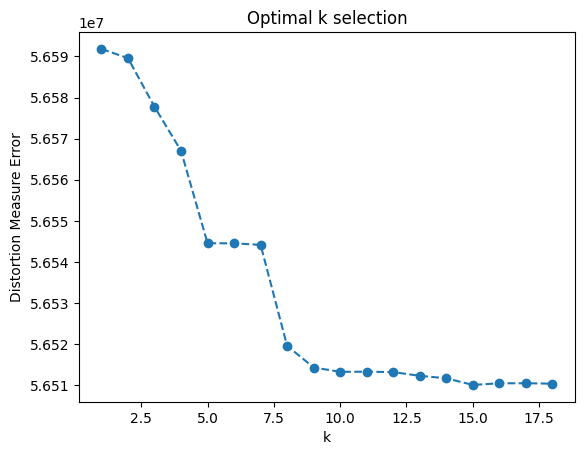

In [15]:
distortion_measure_error = []
K = range(1,19)
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(scale_data)
    score = distortion_measure(data, km.cluster_centers_)
    distortion_measure_error.append(score)

plt.plot(K, distortion_measure_error, marker='o', linestyle='--')
plt.xlabel('k')
plt.ylabel('Distortion Measure Error')
plt.title('Optimal k selection')
plt.show()

Based on the graphs we believe when `k` = 7 is the most optimal k selection

In [16]:
km = KMeans(n_clusters=7, n_init=10)
km = km.fit(scale_data)
labels = km.labels_

data['pred_label'] = labels

### DBSCAN

### Gaussian